# Logistic Regression for Covid-19 Indonesia

Bismillah
Kali ini saya ingin membuat model logistik pasien positif virus covid-19 di indonesia berdasarkan data dari 1 Maret 2020 sampai hari ini. Notebook ini dibuat karena terinspirasi dari https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d

# Library

In [29]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/covid-19'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

# Input Data


In [73]:
df=pd.read_csv('confirmed_acc.csv')

Mengubah format tanggal menjadi jumlah hari terhitung dari 1 Maret 2020

In [74]:
df = df.loc[:,['date','cases']]
FMT = '%m/%d/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("3/1/2020", FMT)).days  )

In [16]:
df

,date,cases
0,-39,0
1,-38,0
2,-37,0
3,-36,0
4,-35,0
5,-34,0
6,-33,0
7,-32,0
8,-31,0
9,-30,0


# Membuat Model Logistik


In [38]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [42]:
x = list(df.iloc[39:,0])
y = list(df.iloc[39:,1])
fit = curve_fit(logistic_model,x,y)

In [19]:
A,B=fit
#nilai a,b,
A

array([   6.84447489,   36.88249708, 5549.14245119])

In [20]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.2983845470579097, 1.0993775415976836, 441.26117362026594]

In [21]:
#Kemungkinan terburuk
a=A[0]+errors[0]
b=A[1]+errors[1]
c=A[2]+errors[2]

In [68]:
#Jumlah hari maksimal dari 1 Maret 2020
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
sol

106

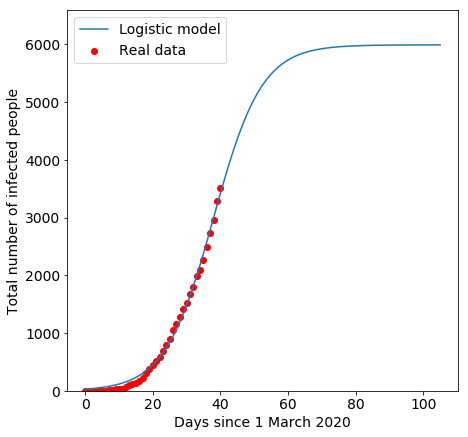

In [69]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,a,b,c) for i in x+pred_x], label="Logistic model" )

plt.legend()
plt.xlabel("Days since 1 March 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

# R Square

In [61]:
y_pred_logistic = [logistic_model(i,a,b,c) for i in x]
p=mean_squared_error(y,y_pred_logistic)

s1=(np.subtract(y,y_pred_logistic)**2).sum()
s2=(np.subtract(y,np.mean(y))**2).sum()
r=1-s1/s2
print("R^2 adalah {}".format(r))
print("Mean square errornya adalah {}".format(p))

R^2 adalah 0.9956633258797173
Mean square errornya adalah 4611.917218172692


In [71]:
### Tanggal wabah maksimal
from datetime import timedelta, date
from datetime import datetime  
from datetime import timedelta 

start_date = "01/03/20"

date_1 = datetime.strptime(start_date, "%d/%m/%y")

end_date = date_1 + timedelta(days=sol)

x = end_date.strftime("%d %B %Y")

# Kesimpulan

In [72]:
print("Jumlah kasus maksimal di indonesia menurut prediksi adalah {:f}".format(A[2]+errors[2])) #Penambahan dengan error
print("Puncak wabah adalah {:.0f} hari setelah 1 Maret 2020 atau {}". format(sol,x))

Jumlah kasus maksimal di indonesia menurut prediksi adalah 5990.403625
Puncak wabah adalah 106 hari setelah 1 Maret 2020 atau 15 June 2020


Notebook ini benar-benar terinspirasi dari https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d.

Mungkin prediksi yang dilakukan tidak efektif dikarenakan data yang digunakan untuk prediksi belum banyak. Kebijakan-kebijakan pemerintah juga memengaruhi jumlah kasus positif di indonesia. dan banyak lagi variabel yang tidak diperhitungkan pada prediksi ini.